In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Eye-diseases/')

In [0]:
from IPython.display import Image

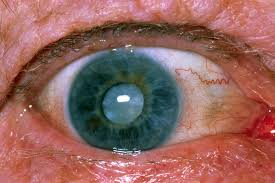

In [8]:
Image('test/Cataracts/image-17.jpeg')

In [9]:
ls

test/  train/


In [0]:
import tensorflow                         #The Tools 
from tensorflow import keras                   
from tensorflow.keras.models import Sequential                      #The Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense        #To exact details frm Features

In [0]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'),          # The InputLayerFirst Declare Neurons thgus Conv2D *Add the Matrics *Add the input Layer 64,64 is the Pixel & 3  the no of Channels thus RGB
    MaxPooling2D(pool_size=(2,2)),  #it can repeat            #Hidden Layer
    Conv2D(32, (3,3), activation='relu'),                      #Hidden Layer
    MaxPooling2D(pool_size=(2,2)),                                     #Hidden Layer
    Flatten(),                                                  
    Dense(128, activation='relu'),                              
    Dense(5, activation='softmax')                  
])

In [0]:
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy']
             )

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_data = ImageDataGenerator(
                                 rescale=1./225, 
                                 shear_range=0.2,               
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 )

test_data = ImageDataGenerator(rescale=1./255)  

train_data = train_data.flow_from_directory('./train', target_size=(64,64), batch_size=32, class_mode='binary')

test_data =  test_data.flow_from_directory('./test',  target_size=(64,64), batch_size=32, class_mode='binary')

Found 383 images belonging to 5 classes.
Found 383 images belonging to 5 classes.


In [25]:
model.fit_generator(train_data, epochs=20)

Epoch 1/20
12/12 [==============================] - 3s 232ms/step - loss: 0.0480 - sparse_categorical_accuracy: 0.9896
Epoch 2/20
12/12 [==============================] - 3s 226ms/step - loss: 0.1421 - sparse_categorical_accuracy: 0.9687
Epoch 3/20
12/12 [==============================] - 3s 212ms/step - loss: 0.1062 - sparse_categorical_accuracy: 0.9713
Epoch 4/20
12/12 [==============================] - 3s 215ms/step - loss: 0.0892 - sparse_categorical_accuracy: 0.9739
Epoch 5/20
12/12 [==============================] - 3s 220ms/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9974
Epoch 6/20
12/12 [==============================] - 3s 213ms/step - loss: 0.0326 - sparse_categorical_accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 3s 213ms/step - loss: 0.0368 - sparse_categorical_accuracy: 0.9896
Epoch 8/20
12/12 [==============================] - 3s 223ms/step - loss: 0.0267 - sparse_categorical_accuracy: 1.0000
Epoch 9/20
12/12 [==============================

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
test_image = image.load_img('test/Cataracts/image-17.jpeg', target_size=(64,64))
test_image = image.img_to_array(test_image)

In [0]:
import numpy as np
test_image = np.expand_dims(test_image, axis=0)

In [0]:
prediction = np.argmax(model.predict(test_image))

In [34]:
if prediction == 0:
  print('Bulging_Eyes')
elif prediction == 1:
  print('Cataracts') 
elif prediction ==2:
  print('Crossed Eyes')
elif prediction == 3:
  print('Glucoma')
elif prediction == 4:
  print('Uveitis')

Cataracts


In [0]:
model.save("model.h5",model)